# 形態學概述

```
形態學是一個在影像處理和計算機視覺中廣泛使用的技術，主要涉及在二值化影像或灰階影像中處理形狀和結構。
它使用形態學操作來改變影像的形狀、大小和結構，用於多種應用，包括邊緣檢測、噪點消除、特徵提取等。
```
## 基本操作

形態學的基本操作包括以下幾個：

- **膨脹 (Dilation)**：這個操作與侵蝕相反，會使影像中的亮點變大。通常用來增加物體的大小，或者填補物體內的空隙。
- **侵蝕 (Erosion)**：這個操作會將影像中的亮點變小，主要用於去除小噪點。通常用來減小物體的大小，或者消除物體間的細小連接。
- **開運算 (Opening)**：這個操作是先侵蝕後膨脹，主要用於去除小的噪點和瑕疵。
- **閉運算 (Closing)**：這個操作是先膨脹後侵蝕，主要用於填補影像中的小孔洞和裂縫。

## 結構元素

形態學操作的核心在於結構元素。結構元素是一個定義好的形狀（例如矩形、圓形或十字形），<br>
用來執行侵蝕、膨脹等操作。選擇合適的結構元素對操作的效果至關重要。

## 形態學應用

形態學在許多影像處理應用中發揮了關鍵作用，包括：

- **邊緣檢測**：通過侵蝕和膨脹來強調影像中的邊緣。
- **物體分割**：使用開運算和閉運算來分割影像中的不同部分。
- **去噪**：使用開運算來去除小噪點，使用閉運算來填補小孔洞。
- **特徵提取**：利用形態學操作來提取影像中的特徵。

## 注意事項

形態學操作的效果受到結構元素的大小和形狀的影響。<br>
較大的結構元素可以處理較大的物體，而較小的結構元素更適合細節處理。<br>
因此，在使用形態學時，選擇合適的結構元素是關鍵。

## 膨脹

In [1]:
import cv2
import numpy as np
img=np.zeros((5,5),np.uint8)
img[2:3,1:4]=1
kernel = np.ones((3,1),np.uint8)
dilation = cv2.dilate(img,kernel)
print("img=\n",img)
print("kernel=\n",kernel)
print("dilation\n",dilation)


img=
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 1 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
kernel=
 [[1]
 [1]
 [1]]
dilation
 [[0 0 0 0 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 0 0 0 0]]


## 結構圖元素

In [2]:
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
print("MORPH_CROSS\n",element)
element = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
print("MORPH_RECT\n",element)
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
print("MORPH_ELLIPSE\n",element)
#手動設計
kernel = np.uint8([
[0, 0, 1, 0, 0],
[0, 1, 1, 1, 0],
[1, 1, 1, 1, 1],
[0, 1, 1, 1, 0],
[0, 0, 1, 0, 0]
])

MORPH_CROSS
 [[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]
MORPH_RECT
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
MORPH_ELLIPSE
 [[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


## 侵蝕

In [3]:
import cv2
import numpy as np
img=np.zeros((5,5),np.uint8)
img[1:4,1:4]=1
kernel = np.ones((3,1),np.uint8)
erosion = cv2.erode(img,kernel)
print("img=\n",img)
print("kernel=\n",kernel)
print("erosion=\n",erosion)

img=
 [[0 0 0 0 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 0 0 0 0]]
kernel=
 [[1]
 [1]
 [1]]
erosion=
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 1 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


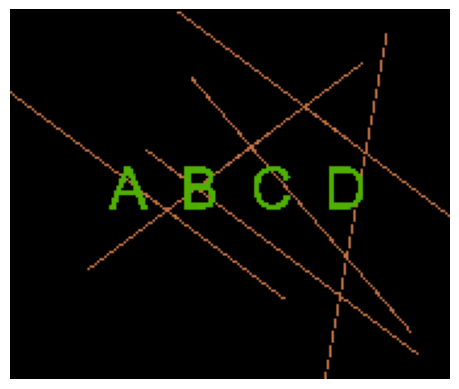

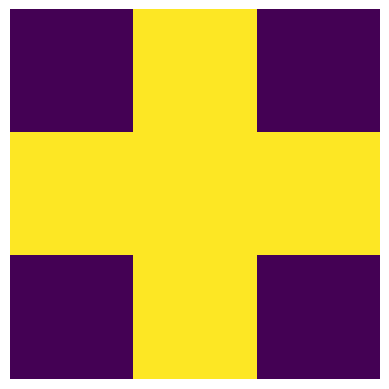

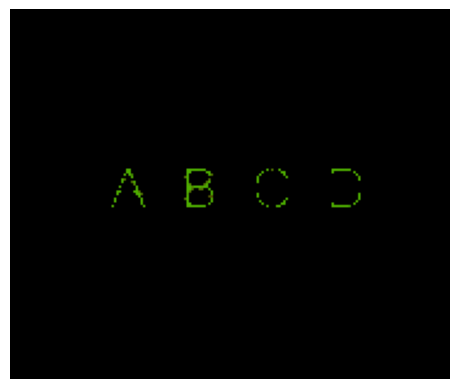

In [4]:
from matplotlib import pyplot as plt
img = cv2.imread('data/erosion.png')
img = cv2.resize(img,None,fx=0.2, fy=0.2, 
                 interpolation = cv2.INTER_CUBIC)
plt.axis('off')
plt.imshow(img)
plt.show()

element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
plt.axis('off')
plt.imshow(element)
plt.show()

dilated = cv2.erode(img,element)
plt.axis('off')
plt.imshow(dilated)
plt.show()


# 開運算與閉運算
```
在影像處理中，開運算和閉運算是常用的形態學操作，主要用於處理影像中的噪點、瑕疵、空隙等問題。
這兩種操作都涉及到侵蝕和膨脹這兩個基本過程，但順序不同。
```
## 開運算
開運算的順序是**先侵蝕，後膨脹**<br>
這種操作有助於清除影像中的小點、毛刺和瑕疵噪點，讓特徵更加清晰<br>
特別適用於去除圖像中不必要的細小結構，而不會改變主要特徵的形狀<br>

### 主要應用
- 清除影像中的小噪點
- 去除毛刺和不規則部分
- 提高主要特徵的清晰度

## 閉運算
閉運算的順序是**先膨脹，後侵蝕**<br>
它通常用於填補小的空隙、彌合影像中的裂縫或凹角，幫助維持或恢復原始形狀<br>

### 主要應用
- 填補影像中的小裂縫
- 弭合凹角
- 去除影像中的小孔洞

### 例子
- 較小的結構元素適合細微的噪點和瑕疵
- 較大的結構元素適合處理更大的空隙和裂縫
- 不同的形狀可以用來處理特定的特徵，如十字形、圓形或矩形

## 進一步的操作
在使用開運算和閉運算處理影像後，後續的操作可以和原始影像進行運算，產生多樣化的結果。<br>
處理過的影像和原影像以強調特定區域的特徵，或者將不同操作的結果結合起來，創建更為複雜的效果<br>
例如：邊緣、區域填充、凸形輪廓、細線化、粗線化、找骨架、剪枝、形態濾波、形態梯度、高帽轉換、顆粒量測、紋理分割


In [18]:
from matplotlib import pyplot as plt
#%matplotlib notebook
img = cv2.imread('data/OC.png',0)
plt.axis('off')
plt.imshow(img, "gray")
plt.show()

# 設置卷積核
ret,thresh1 = cv2.threshold(img,34,255,cv2.THRESH_BINARY)
plt.axis('off')
plt.imshow(thresh1, "gray")
plt.show()

kernel = np.ones((10, 10), np.uint8) 
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(13,13))
opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, element) 
plt.axis('off')
plt.imshow(opening, "gray")
plt.show()

closing = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, element) 
plt.axis('off')
plt.imshow(closing, "gray")
plt.show()

## 形態學檢測邊緣

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
img = cv2.imread('data/image3.png')
element = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

dilate = cv2.dilate(img, element)
erode = cv2.erode(img, element)

# 將兩幅圖像相減獲得邊，第一個參數是膨脹後的圖像，第二個參數是腐蝕後的圖像
# cv2.absdiff：(膨脹後的圖像，腐蝕後的圖像)
result = cv2.absdiff(dilate, erode)#絕對值的差異

# 上面得到的結果是灰度圖，將其二值化以便更清楚的觀察結果
retval, result = cv2.threshold(result, 40, 255, cv2.THRESH_BINARY)
# 反色，即對二值圖每個像素取反
result = cv2.bitwise_not(result)

plt.rcParams['figure.figsize'] = [200, 100] 
plt.rcParams['font.size'] = 150

img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1)
plt.imshow(img2)
plt.xticks([]), plt.yticks([])
plt.title('origin image BGR')

result2 = cv2.cvtColor(result  , cv2.COLOR_BGR2RGB)
plt.subplot(1,2,2)
plt.imshow(result2,'gray')
plt.xticks([]), plt.yticks([])
plt.title('edge')

Text(0.5, 1.0, 'edge')

## 形態學梯度運算
形態學梯度運算是用影像的膨脹影像減腐蝕影像的操作，該操作可以取得原始影像中前景影像的邊緣
語法結構如下:
> gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

In [ ]:
import cv2
import numpy as np
original=cv2.imread("gradient.bmp",cv2.IMREAD_UNCHANGED)
kernel=np.ones((5,5),np.uint8)
gardient=cv2.morphologyEx(original,cv2.MORPH_GRADIENT,kernel)

plt.rcParams['figure.figsize'] = [200, 100] 
plt.rcParams['font.size'] = 150

img_original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1)
plt.imshow(img_original)
plt.xticks([]), plt.yticks([])
plt.title('origin image BGR')

img_gardien = cv2.cvtColor(gardient, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,2)
plt.imshow(img_gardien)
plt.xticks([]), plt.yticks([])
plt.title('edge')

# 頂帽（Top Hat）和黑帽（Black Hat）
```
頂帽和黑帽是影像形態學操作中的兩個重要概念，它們主要用來強調或消除影像中的特定特徵。
這兩種操作都涉及形態學侵蝕和膨脹，但用途和效果不同。
```
## 頂帽（Top Hat）

頂帽是將原始影像與其閉運算結果相減，這樣可以強調影像中比周圍背景更亮的特徵。常見應用包括：

- **強調小亮點**：在影像中識別和強調小亮點或亮區域。
- **分割前景**：用於分割比周圍環境更亮的前景物體。
- **文字識別**：在文檔影像中，頂帽有助於強調文本區域。

## 黑帽（Black Hat）

黑帽是將原始影像與其開運算結果相減，這樣可以強調影像中比周圍背景更暗的特徵。主要用於：

- **強調小暗點**：在影像中識別和強調小暗點或暗區域。
- **填補裂縫**：在二值化圖像中用來填補因影像雜訊造成的裂縫。
- **影像補全**：在分割影像時，黑帽可以幫助恢復被侵蝕掉的小特徵。

In [ ]:
import cv2  
import numpy as np  

#讀取圖片
src = cv2.imread('data/open.jpg', cv2.IMREAD_UNCHANGED)

#設定卷積核
kernel = np.ones((17,17), np.uint8)

#影象頂帽運算
result = cv2.morphologyEx(src, cv2.MORPH_TOPHAT, kernel)

#顯示影象
cv2.imshow("src", src)
cv2.imshow("result", result)

#等待顯示
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2  
import numpy as np  

#讀取圖片
src = cv2.imread('data/close.jpg', cv2.IMREAD_UNCHANGED)

#設定卷積核
kernel = np.ones((10,10), np.uint8)

#影象黑帽運算
result = cv2.morphologyEx(src, cv2.MORPH_BLACKHAT, kernel)

#顯示影象
cv2.imshow("src", src)
cv2.imshow("result", result)

#等待顯示
cv2.waitKey(0)
cv2.destroyAllWindows()
